In [13]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv("train.csv", delimiter=';')

# Chuyển Publication_Time thành số phút trong ngày
data['Publication_Time'] = pd.to_datetime(data['Publication_Time'], format="%I:%M %p", errors='coerce')
series = data['Publication_Time'].dt.hour * 60 + data['Publication_Time'].dt.minute

# Khởi tạo mô hình ARIMA(1,1,1) — Kalman sẽ được sử dụng ngầm
model = SARIMAX(series, order=(1, 1, 1), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit(disp=False)
state_estimates = results.filtered_state

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


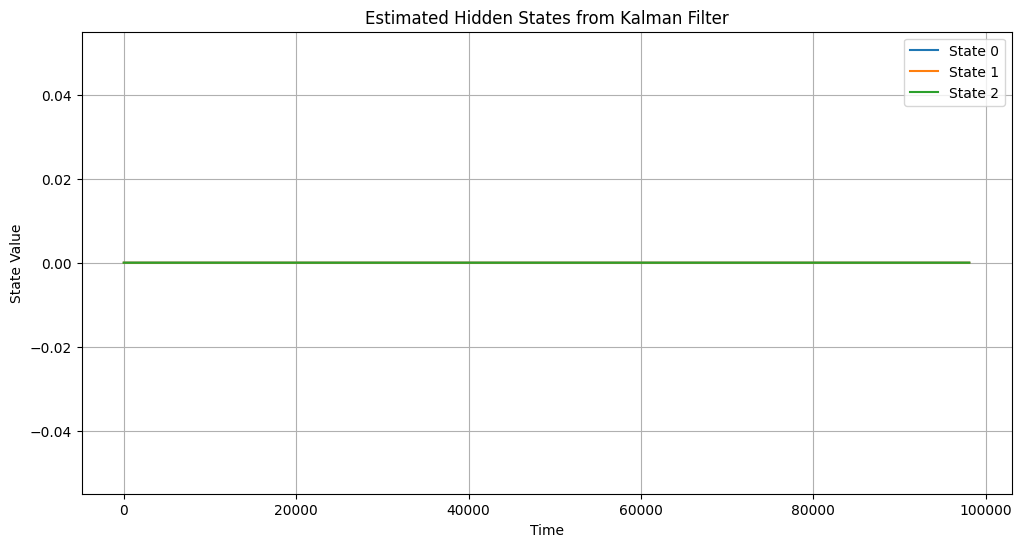

In [14]:



# Vẽ các trạng thái ẩn
plt.figure(figsize=(12, 6))
for i in range(state_estimates.shape[0]):
    plt.plot(state_estimates[i], label=f'State {i}')
plt.title('Estimated Hidden States from Kalman Filter')
plt.xlabel('Time')
plt.ylabel('State Value')
plt.legend()
plt.grid(True)
plt.show()

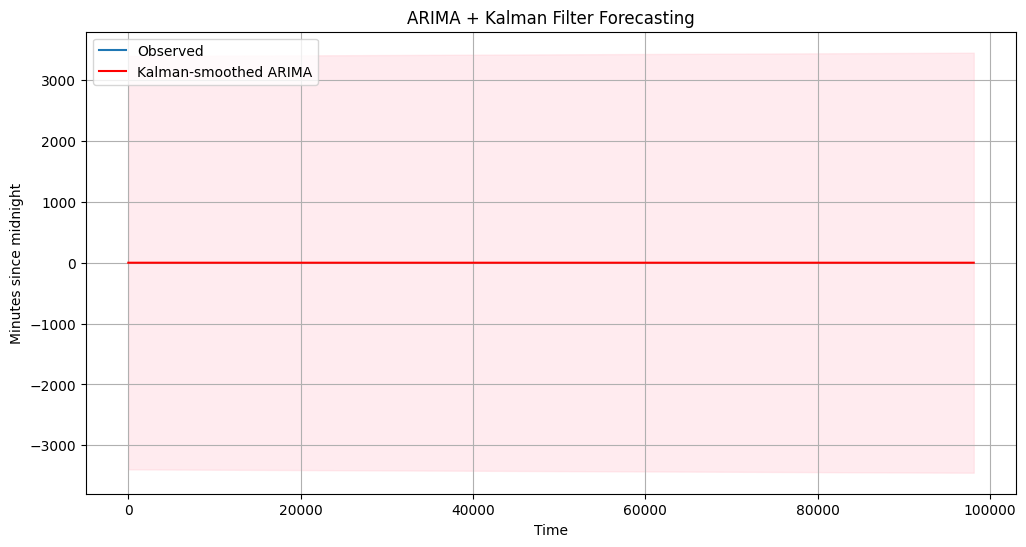

In [15]:
forecast = results.get_prediction()
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Observed')
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Kalman-smoothed ARIMA')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA + Kalman Filter Forecasting')
plt.xlabel('Time')
plt.ylabel('Minutes since midnight')
plt.legend()
plt.grid(True)
plt.show()